In [175]:
#Question1
#Import the datasets and libraries, check datatype, statistical summary, shape, null values or
#incorrect imputation. (5 marks)

In [233]:
#Import libraries
import pandas as pd     
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from IPython.core.display import display, HTML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score,roc_curve
from scipy import stats
from scipy.stats import zscore
import statsmodels.api as sm

#Set chart size
plt.rcParams['figure.figsize'] = [10, 8]

In [234]:
#Import datasets, read the csv file into a dataframe
with pd.option_context('display.precision', 10):
    bankDF =pd.read_csv("Bank_Personal_Loan_Modelling.csv", float_precision=None)
bank_account = bankDF

In [235]:
#Check first 25 rows of data set

bank_account.head(25)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [236]:
#Check datatype

bank_account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [237]:
#Check statistical summary

bank_account.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [238]:
#Check shape of the dataset

bank_account.shape

(5000, 14)

In [239]:
#Check for null values or incorrect imputation

bank_account.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [240]:
bank_account.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [241]:
#check if any non-numeric value present ##ToChange

print(bank_account[~bank_account.applymap(np.isreal).all(1)])

Empty DataFrame
Columns: [ID, Age, Experience, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []


In [242]:
# Check for people having negative experience

bank_account[bank_account.Experience <0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [243]:
#Grouping the number of people having negative experience by age.

bank_account[bank_account['Experience'] < 0].groupby('Age')['Experience'].count()

Age
23    12
24    17
25    18
26     1
28     1
29     3
Name: Experience, dtype: int64

In [244]:
#Just replacing negative experience will not produce accurate results, so therefore better approach would be to used median by age.

bank_account[(bank_account['Experience'] >0) & (bank['Age']<=29)].groupby('Age')['Experience'].median()

Age
25    1
26    2
27    2
28    3
29    4
Name: Experience, dtype: int64

In [245]:
#Since we have people with negative experince for the 23 and 24 ages and produced median is not possitive it would be better to replace with 0

bank_account[(bank_account['Experience'] != 0) & (bank['Age'] == 23)|(bank['Age'] == 24)].groupby('Age')['Experience'].median()

Age
23   -1.5
24   -1.0
Name: Experience, dtype: float64

In [246]:
#Replacing experience of people with age 23 and 24 with zero

bank_account.loc[(bank_account['Experience']<0) & (bank_account['Age'] == 23)|(bank_account['Age'] == 24),'Experience'] = 0

In [247]:
#Replacing with median the experience of people of with age 25 to 29

for r in range(25,30):  
    bank_account.loc[(bank_account['Experience']<0) & (bank_account['Age'] == r),'Experience'] = bank_account[(bank_account['Experience']>=0) & (bank_account['Age'] == r)]['Experience'].median()

In [248]:
#Converting back the experience column in to int64 from float64

bank_account = bank_account.round(0).astype({"Experience":'int64'}) 
bank_account

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,2.0,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,2.0,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,3.0,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,2.0,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.0,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.0,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.0,2,0,0,0,0,1,0


In [249]:
#Checking if any people still having negative experience

bank_account[bank_account['Experience'] < 0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [250]:
#Question 2
#EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)
# Number of unique in each column?
# Number of people with zero mortgage?
# Number of people with zero credit card spending per month?
# Value counts of all categorical columns.
# Univariate and Bivariate
# Get data model ready

In [251]:
#Number of unique in each column
#for r in bank.columns:
 #   print(r," :", bank[r].nunique())
    
bank_account.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                   11
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [252]:
#Number of people with zero mortgage

(bank_account['Mortgage']==0).sum()

3462

In [253]:
#Number of people with zero credit card spending per month

ZeroCreditCount = bankDF[bankDF.CCAvg.astype(str) == '0.0']
ZeroCreditCount.CCAvg.count()


106

In [255]:
#Value counts of all categorical columns.

bank_DFX = bank_account[['Education','Family','Online','CreditCard',
               'Securities Account','CD Account','Personal Loan']] 

for r in bank_DFX.columns:
   print("Value Counts: ",r,"\n",bank_DFX[r].value_counts(),"\n")

Value Counts:  Education 
 1    2096
3    1501
2    1403
Name: Education, dtype: int64 

Value Counts:  Family 
 1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64 

Value Counts:  Online 
 1    2984
0    2016
Name: Online, dtype: int64 

Value Counts:  CreditCard 
 0    3530
1    1470
Name: CreditCard, dtype: int64 

Value Counts:  Securities Account 
 0    4478
1     522
Name: Securities Account, dtype: int64 

Value Counts:  CD Account 
 0    4698
1     302
Name: CD Account, dtype: int64 

Value Counts:  Personal Loan 
 0    4520
1     480
Name: Personal Loan, dtype: int64 



In [256]:
#Univariate and Bivariate

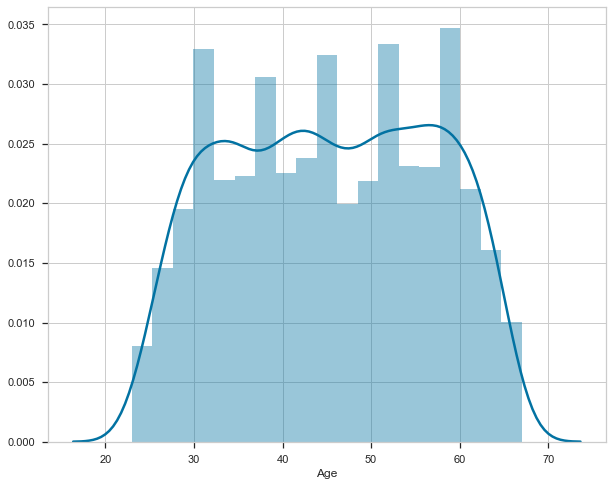

In [257]:
#Customer ages are above 20 and below 70

sns.distplot(bank_account['Age'])

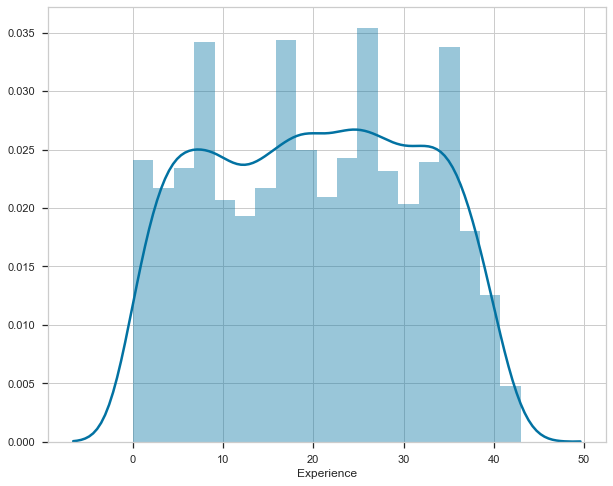

In [258]:
#Work Expreiences in years

sns.distplot(bank_account['Experience'])

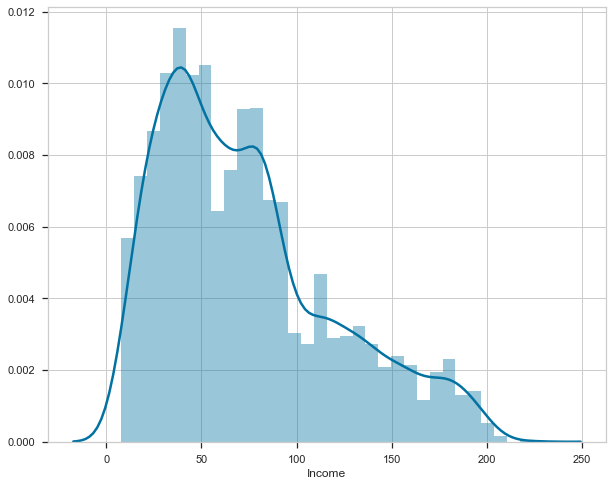

In [259]:
#The distribution of the Customer Incomes 

sns.distplot(bank_account['Income'])

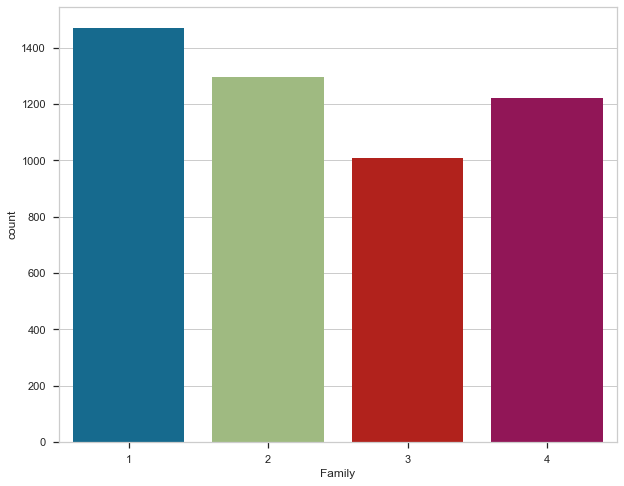

In [260]:
#The distribution of Family Sizes

sns.countplot(bank_account['Family'])

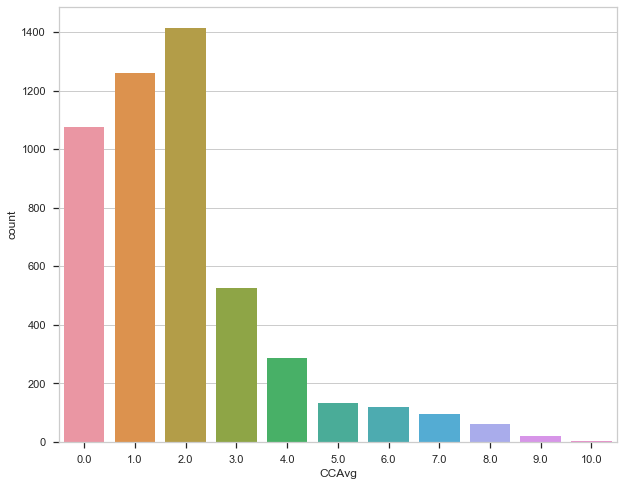

In [261]:
#The distribution of the Avg CCard Spending per month

sns.countplot(bank_account['CCAvg'])

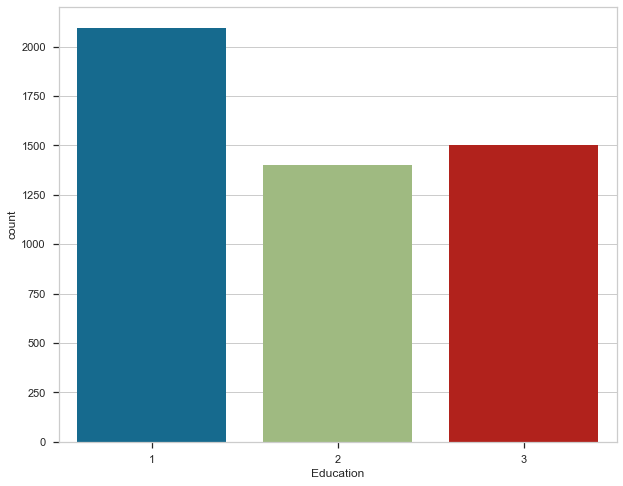

In [262]:
#The distribution of the Education Levels, there are more undergraduates
#1: Undergrad
#2: Graduate
#3: Advanced/Professional

sns.countplot(bank_account['Education'])

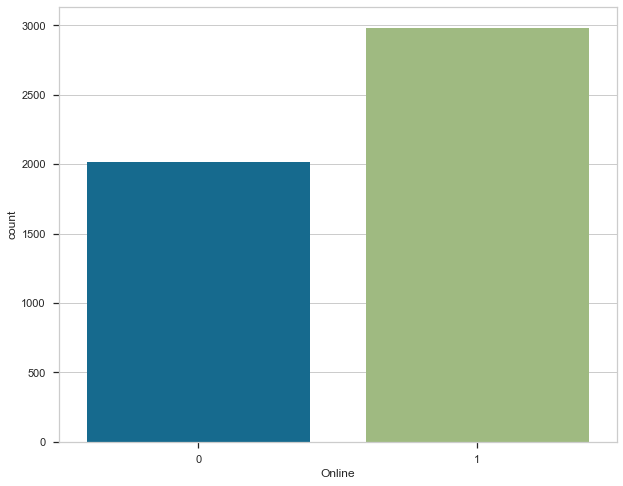

In [263]:
#use internet banking facilities denoted with value 1, more people have online banking facility

sns.countplot(bank_account['Online'])

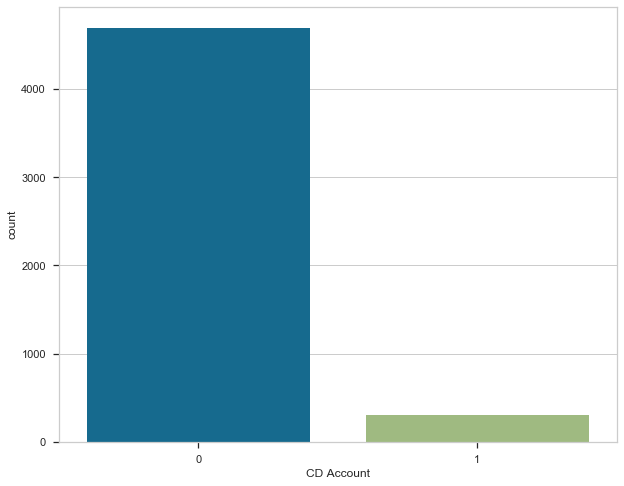

In [264]:
#Few customers have a CD account with the bank

sns.countplot(bank_account['CD Account'])

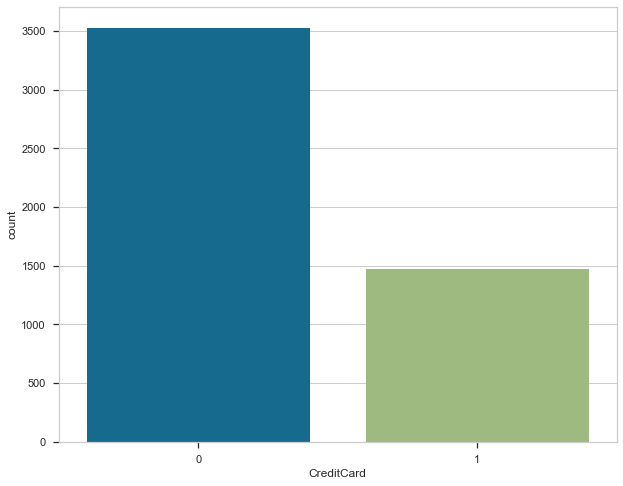

In [265]:
#Few customers have a Credit Cardt with the bank

sns.countplot(bank_account['CreditCard'])

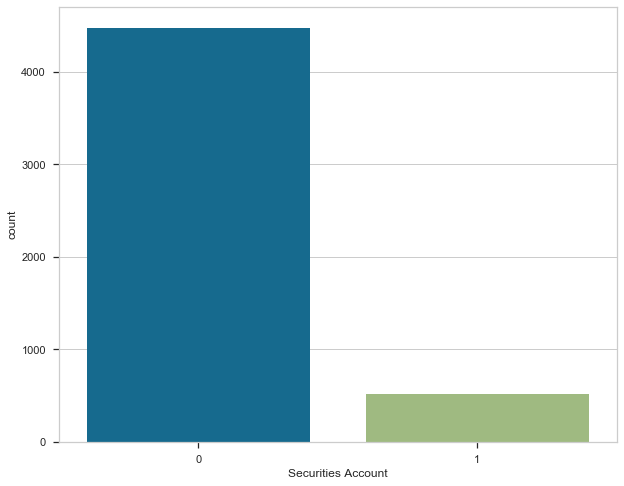

In [209]:
#Few customers have Securities account with the bank

sns.countplot(bank_account['Securities Account'])

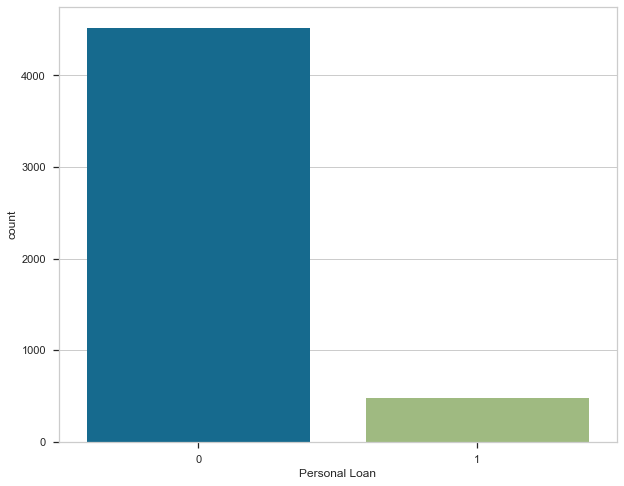

In [210]:
#Few customers have personal loan with the bank

sns.countplot(bank_account['Personal Loan'])

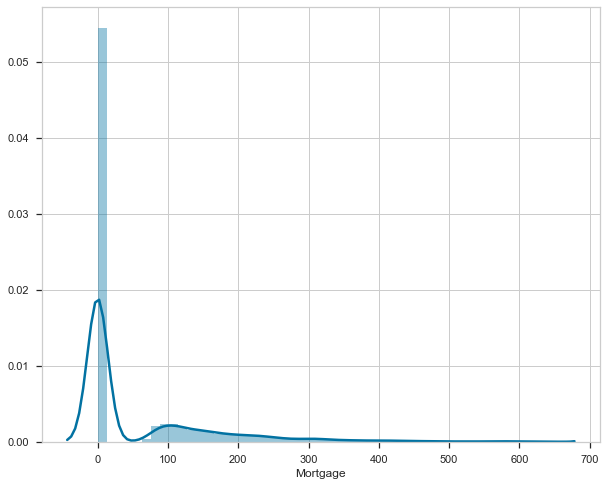

In [211]:
#More customers have 0 Mortgage

sns.distplot(bank_account['Mortgage'])

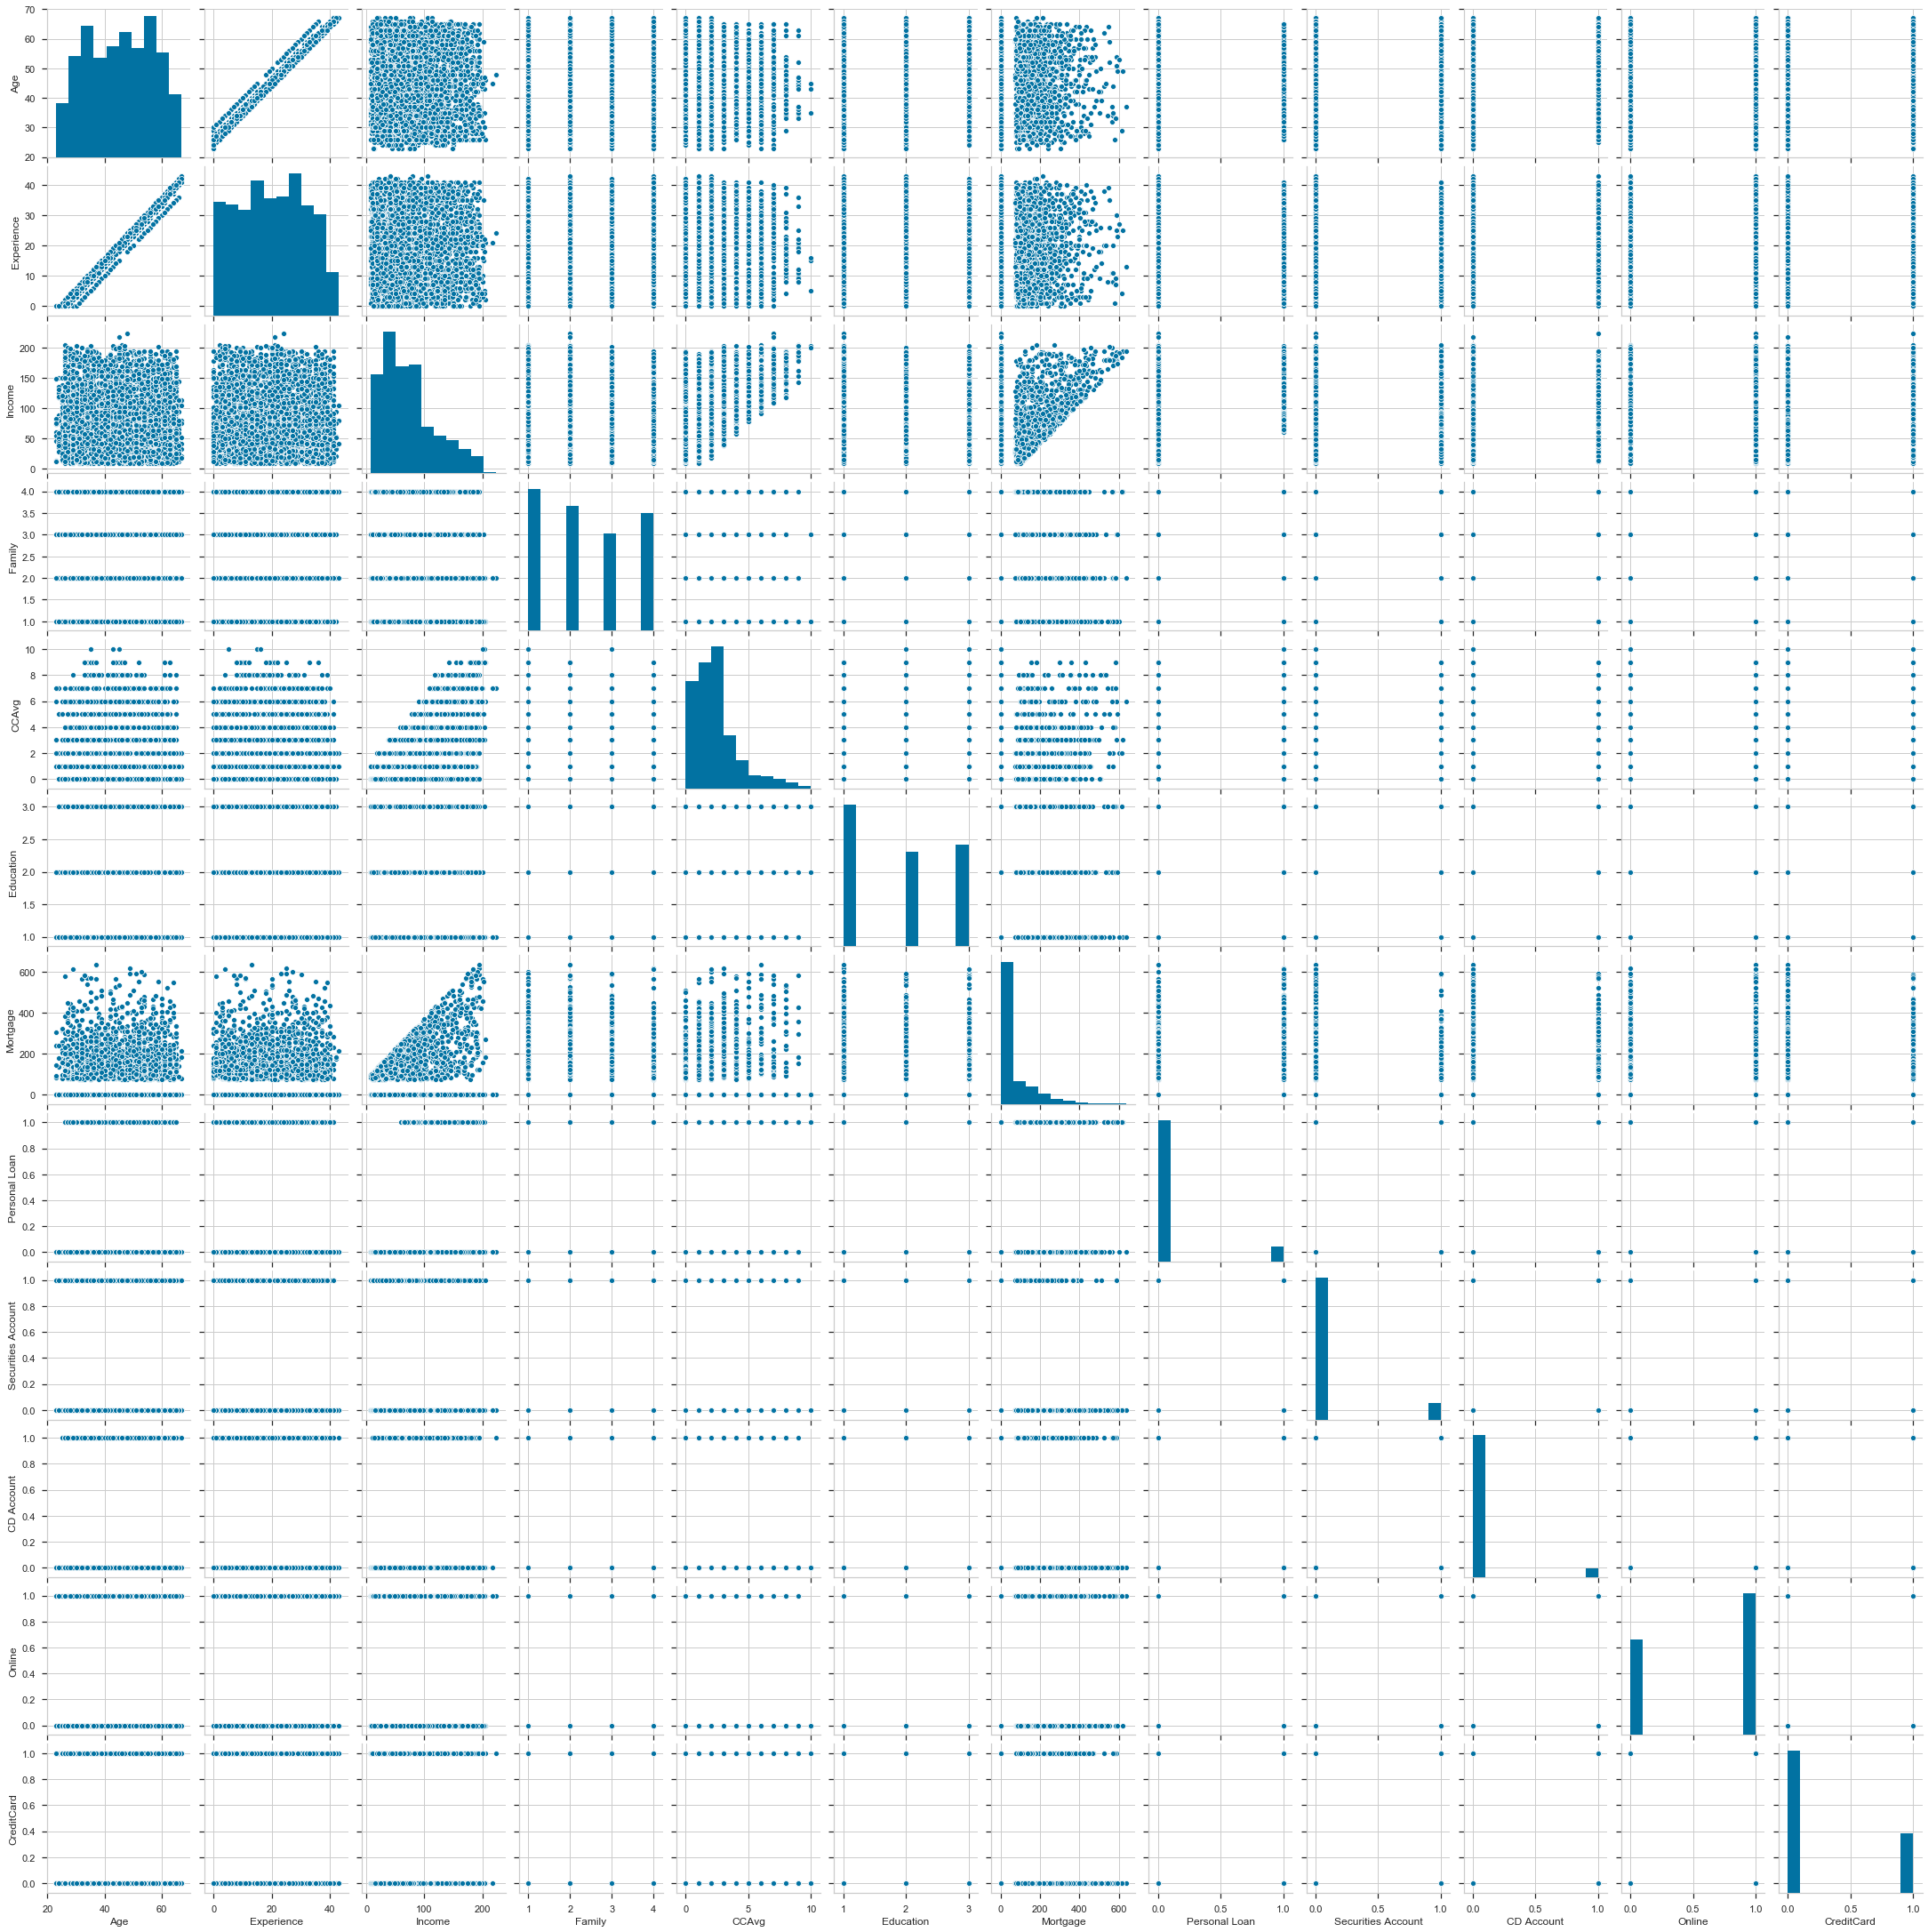

In [212]:
#Bivariate

plt = sns.pairplot(bank_account[['Age','Experience','Income','Family','CCAvg' ,'Education' , 'Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard']] )

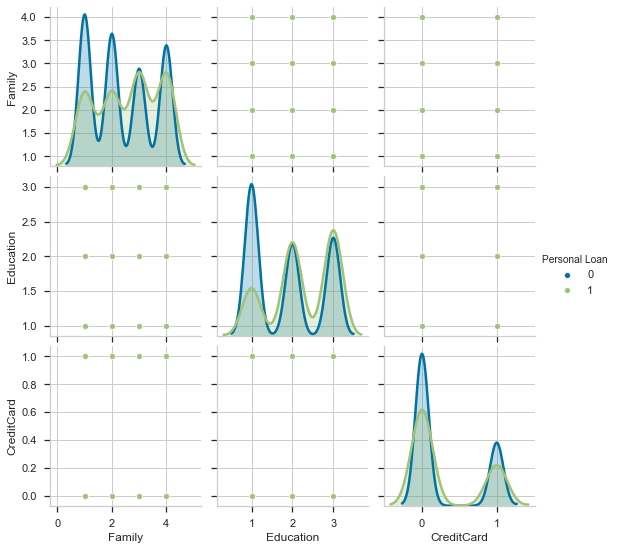

In [213]:
sns.pairplot(bank_account[['Family', 'Education', 'CreditCard', 'Personal Loan']], hue = 'Personal Loan', diag_kind = 'kde');

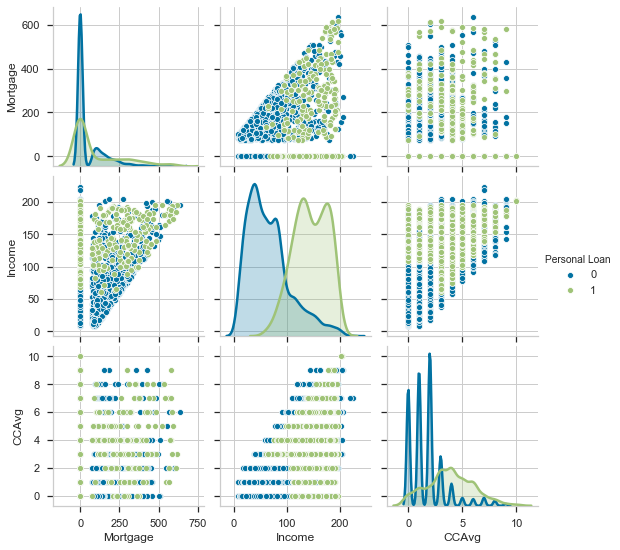

In [214]:
sns.pairplot(bank_account[['Mortgage', 'Income', 'CCAvg', 'Personal Loan']], hue = 'Personal Loan', diag_kind = 'kde');

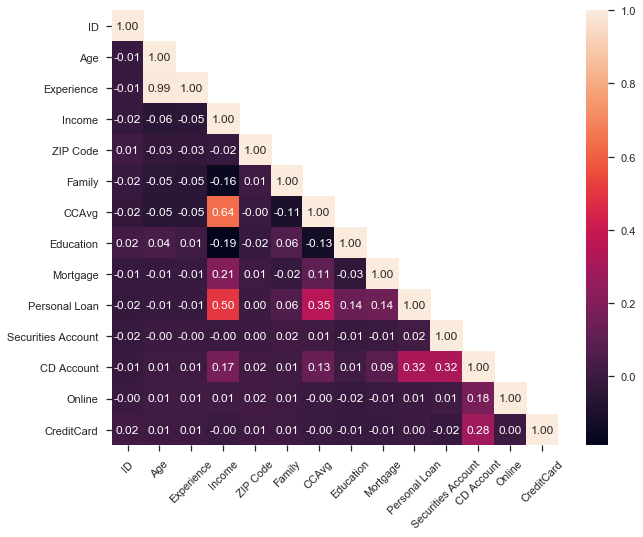

In [215]:
corr = bank_account.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})

# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')

#Rotating the labels to make is readable
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=45)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=0)

#As seen below Personal Loan has strong correlation with CCAvg and Income

In [216]:
#Get data model ready
Bank_Regression = bank_account

In [217]:
#Droping some columns
Bank_Regression.drop(columns ='ID',inplace=True)
Bank_Regression.drop(columns='Family', inplace=True)
Bank_Regression.drop(columns='Education', inplace=True)
Bank_Regression.drop(columns ='Experience',inplace= True)
Bank_Regression.drop(columns ='ZIP Code',inplace= True)

In [218]:
Bank_Regression['Personal Loan'].value_counts(normalize=True) 
Bank_Regression

,Age,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,2.0,0,0,1,0,0,0
1,45,34,2.0,0,0,1,0,0,0
2,39,11,1.0,0,0,0,0,0,0
3,35,100,3.0,0,0,0,0,0,0
4,35,45,1.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
4995,29,40,2.0,0,0,0,0,1,0
4996,30,15,0.0,85,0,0,0,1,0
4997,63,24,0.0,0,0,0,0,0,0
4998,65,49,0.0,0,0,0,0,1,0


In [219]:
#Question 3
#Split the data into training and test set in the ratio of 70:30 respectively (5marks)

In [220]:
X = Bank_Regression.drop('Personal Loan', axis=1)
y= Bank_Regression['Personal Loan'] # target variable

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [221]:
#Question 4. 
#Use Logistic Regression model to predict whether the customer will take personal loan or not. Print all the metrics related for evaluating the model performance (15 marks)

In [222]:
model = LogisticRegression(solver = 'liblinear')
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)

# Evaluate mode performance 
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1343
           1       0.73      0.41      0.53       157

    accuracy                           0.92      1500
   macro avg       0.83      0.70      0.74      1500
weighted avg       0.91      0.92      0.91      1500



In [223]:
#Question 5
#Check different parameters of Logistic Regression and give your reasoning whether the model performance is affected due to it or not? (10 marks)

In [224]:
#Confusion matrix
def Confusion_Matrix(actual,predicted):
    cm = confusion_matrix(actual,predicted)
    sns.heatmap(cm,annot=True, fmt='.3f', xticklabels=[0,1], yticklabels=[0,1])
    #plt.ylabel('observed')
    #plt.xlabel('Predicted')
    #plt.show()

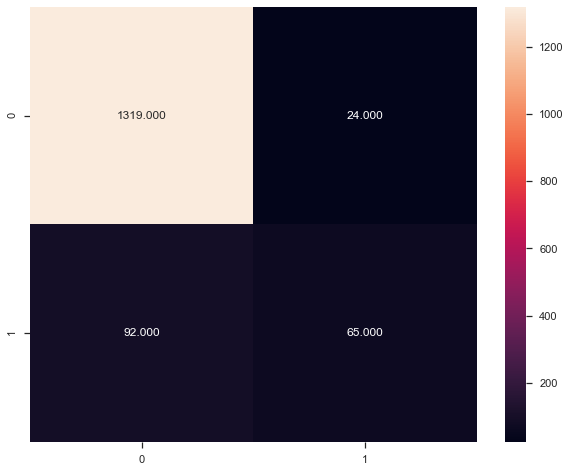

In [225]:
Confusion_Matrix(y_test, y_predicted)

In [226]:
print('Accuracy on train set: {:.3f}'.format(model.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(model.score(X_test, y_test)))
print('Recall score: {:.3f}'.format(recall_score(y_test,y_predicted)))
print('ROC AUC score: {:.3f}'.format(roc_auc_score(y_test,y_predicted)))
print('Precision score: {:.3f}'.format(precision_score(y_test,y_predicted)))

Accuracy on train set: 0.926
Accuracy on test set: 0.923
Recall score: 0.414
ROC AUC score: 0.698
Precision score: 0.730


C:\Users\deval\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


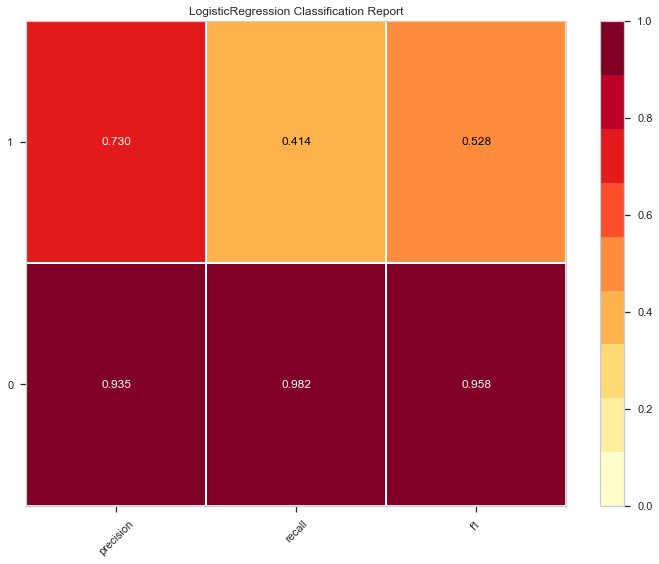

In [227]:
#IMPORTANT
#pip install yellowbrick - execute if not installed

from yellowbrick.classifier import ClassificationReport, ROCAUC
Report_viz = ClassificationReport(LogisticRegression(solver = 'liblinear',random_state=42))
Report_viz.fit(X_train,y_train)
Report_viz.score(X_test,y_test)
Report_viz.show()


C:\Users\deval\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


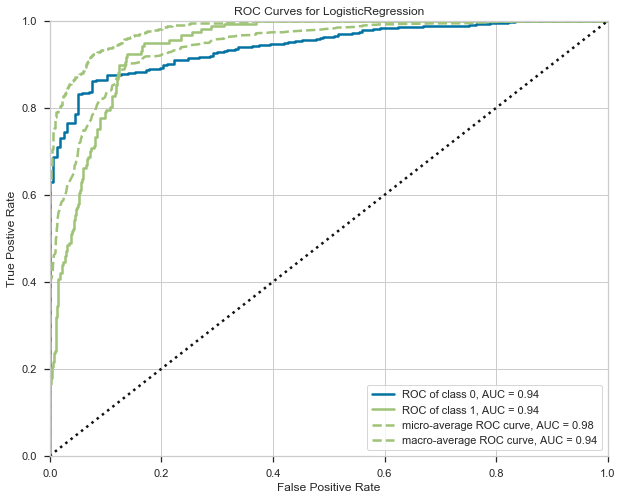

In [228]:
rocCurve = ROCAUC(model)
rocCurve.fit(X_train, y_train)
rocCurve.score(X_test, y_test)
rocCurve.show()

In [229]:
#Question 6
#Give Business understanding of your model? (5 marks)

In [230]:
print('True Positives-TP: the model rightly predicts that 1319 customers did not take loan.')
print('True Negatives-TN: the model rightly predicts that 65 customers took loan.')
print('False Positives-FP: the model wrongly predicts that 24 customers took loan which has no risk.')
print('False Negatives-FN: the model wrongly predicts that 92 customers did not take loan and has high risk.')

True Positives-TP: the model rightly predicts that 1319 customers did not take loan.
True Negatives-TN: the model rightly predicts that 65 customers took loan.
False Positives-FP: the model wrongly predicts that 24 customers took loan which has no risk.
False Negatives-FN: the model wrongly predicts that 92 customers did not take loan and has high risk.
